In [1]:
import pandas as pd;
import numpy as np;
from statistics import mean;
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt;

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### For the Analysis purpose, we choose the three following features:
##### 1. RM - average number of rooms among homes in neighbourhood
##### 2. LSTAT - % home owners considered 'lower class'
##### 3. PTRATIO -  ratio of students to teachers in primary and secondary schools in the neighborhood

In [3]:
dataset = df
# dataset['PRICE'] = boston.target
Y = boston.target
dataset.head()
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


##### Intuitively, we can assume the following:
##### 1. As RM increases, PRICE increases
##### 2. AS LSTAT increases, PRICE decreases
##### 3. AS PTRATIO increases, PRICE decreases

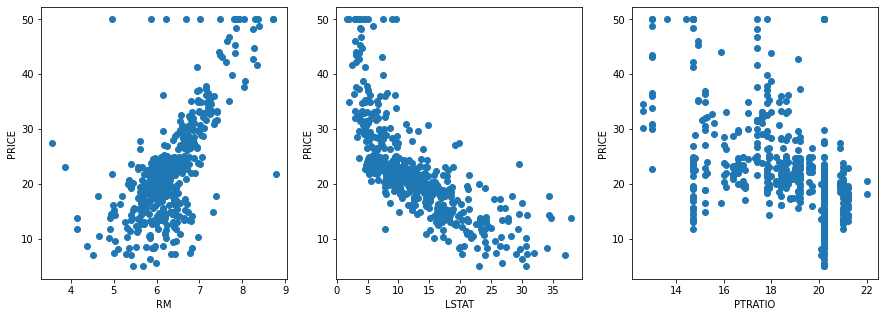

In [4]:
plt.figure(figsize=(15, 5))
columns = ['RM', 'LSTAT', 'PTRATIO']
for col in columns:
	plt.subplot(1, 3, columns.index(col) + 1)
	plt.scatter(dataset[col], Y)
	plt.xlabel(col)
	plt.ylabel('PRICE')
plt.show()

##### Creating a model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#reshaping the data
# X = np.array(dataset['RM']).reshape(-1,1)
X = dataset;
Y = np.array(Y).reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
X_train.shape, Y_train.shape

((404, 13), (404, 1))

In [8]:
X_test.shape, Y_test.shape

((102, 13), (102, 1))

##### Build the regression model

In [9]:
model = linear_model.LinearRegression()

##### Training model

In [10]:
model.fit(X_train, Y_train)

LinearRegression()

##### Apply trained model to make prediction (on test set)

In [11]:
Y_pred = model.predict(X_test)

##### Prediction results

In [12]:
print('Intercept:', model.intercept_)
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Intercept: [34.08718143]
Coefficient of determination (R^2): 0.77


In [13]:
Y_test

array([[25. ],
       [11.7],
       [13.8],
       [16.5],
       [42.3],
       [14.1],
       [27.9],
       [29.8],
       [23.1],
       [17.4],
       [19.9],
       [22. ],
       [24.3],
       [13.9],
       [23.6],
       [21.2],
       [20.6],
       [20.3],
       [22.6],
       [21.7],
       [21.6],
       [50. ],
       [22.7],
       [13.5],
       [13.6],
       [21. ],
       [25. ],
       [24.8],
       [22.8],
       [21.9],
       [18.6],
       [23.1],
       [27.5],
       [ 5. ],
       [14.9],
       [14.8],
       [ 9.7],
       [22. ],
       [20.8],
       [10.8],
       [20.9],
       [28.7],
       [24.7],
       [25.3],
       [24.1],
       [24.4],
       [17.4],
       [26.6],
       [23.4],
       [18.8],
       [19.5],
       [19.3],
       [19.6],
       [50. ],
       [38.7],
       [28.4],
       [34.9],
       [28.7],
       [50. ],
       [19.3],
       [17. ],
       [11.8],
       [14.1],
       [10.5],
       [21.9],
       [23.8],
       [20

In [14]:
Y_pred

array([[22.59168482],
       [13.69642483],
       [15.94994832],
       [22.32460151],
       [37.00608053],
       [17.46768567],
       [19.46698009],
       [32.28947509],
       [22.84770474],
       [15.64627885],
       [19.48596758],
       [27.21655079],
       [24.40292465],
       [17.65039791],
       [28.87211843],
       [21.12543227],
       [22.52066574],
       [23.46728584],
       [27.10877723],
       [21.1875207 ],
       [24.84334523],
       [39.98626876],
       [22.45799166],
       [13.50909567],
       [13.33665119],
       [21.46287898],
       [22.75160566],
       [26.10204583],
       [28.36477695],
       [23.89454582],
       [17.22981278],
       [20.89280328],
       [19.09949067],
       [ 6.65943261],
       [14.56011145],
       [14.65160515],
       [ 9.94418201],
       [21.55929925],
       [23.19952379],
       [11.35478252],
       [21.78901528],
       [30.81335485],
       [24.97943968],
       [25.51340374],
       [25.63647988],
       [28